Необходимо выполнить сокращение признакового пространства матрицы table, оставив только информативные. Для этого вычислите собственные числа и собственные векторы для table так, как это делалось в предыдущих подвигах. Отсортируйте собственные векторы по убыванию собственных чисел и результат (матрицу) сохраните в переменной WW. Затем, Вычислите новый набор признаков объектов выборки table в пространстве векторов WW. Сохраните результат в матрице data_x. Удалите из полученной матрицы data_x последние k признаков, для которых значения собственных чисел 
$λ_i <0.01$

In [2]:
import numpy as np

np.random.seed(0)

n_total = 1000 # число образов выборки
n_features = 200 # число признаков

table = np.zeros(shape=(n_total, n_features))

for _ in range(100):
    i, j = np.random.randint(0, n_total), np.random.randint(0, n_features)
    table[i, j] = np.random.randint(1, 10)

# Gram's matrix
F = 1/n_total * table.T @ table
L, W = np.linalg.eig(F)
temp = sorted(zip(L, W), key=lambda x: x[0], reverse=True)
k = 0
for i in range(len(temp)):
    if temp[i][0] < 0.01:
        k = len(temp) - i
        break

WW = np.array([w[1] for w in temp])

data_x = table @ WW.T
data_x = np.array([x[:-k] for x in data_x])

# Repeat SGD

In [4]:
import numpy as np


# экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.exp(-M)


# производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -np.exp(-M) * x.T * y


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)

Qe = np.mean([loss(w, x, y) for x, y in zip(x_train[:batch_size], y_train[:batch_size])])# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(0, n_train - batch_size - 1)

    Qk = 0
    diff_Qk = []
    for i in range(k, k+batch_size):
        Qk += loss(w, x_train[i], y_train[i])
        diff_Qk += [df(w, x_train[i], y_train[i])]

    Qk /= batch_size
    diff_Qk = np.mean(diff_Qk, axis=0)

    w -= nt * diff_Qk

    Qe = lm * Qk + (1 - lm) * Qe

Q = np.mean([(np.dot(w, x) * y) < 0 for x, y in zip(x_train, y_train)])

print(w)
print(Qe)
print(Q)

[-3.99368023  0.34850649  1.07879392]
0.7092738058526213
0.07


# Task 3

0.4606385324397492


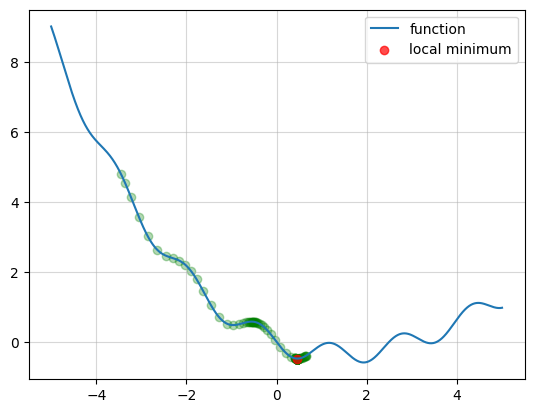

In [24]:
'''
Search point of minimum by the gradient pulse method
'''
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# def func(x):
#     return -0.5 * x + 0.2 * x ** 2 - 0.01 * x ** 3 - 0.3 * np.sin(4*x)

xx = sp.symbols('x')
f = -0.5 * xx + 0.2 * xx ** 2 - 0.01 * xx ** 3 - 0.3 * sp.sin(4*xx)
df = sp.diff(f, xx)

# turn into numpy functions
func = sp.lambdify(xx, f, 'numpy')
dfunc = sp.lambdify(xx, df, 'numpy')

nt = 0.1
x = -3.5
N = 200
gm = 0.8
v = 0

# plotting
x_axis = np.linspace(-5, 5, 10_000)
y_axis = func(x_axis)
plt.plot(x_axis, y_axis, label='function')
plt.grid(True, alpha=0.5)

for i in range(N):
    v = gm * v + (1 - gm) * nt * dfunc(x)
    x -= v
    plt.scatter(x, func(x), c='g', alpha=0.3)
    if i == N-1:
        plt.scatter(x, func(x), c='r', alpha=0.7, label='local minimum')

plt.legend()
print(x)

## Without sympy

In [ ]:
import numpy as np

def func(x):
    return -0.5 * x + 0.2 * x ** 2 - 0.01 * x ** 3 - 0.3 * np.sin(4*x)

def df(x):
    return -0.5 + 0.4 * x - 0.03 * x ** 2 - 0.3 * np.cos(4*x) * 4

nt = 0.1
x = -3.5
N = 200
gm = 0.8
v = 0

for i in range(N):
    v = gm * v + (1 - gm) * nt * df(x)
    x -= v


# Task 4

In [3]:
import numpy as np


def func(x):
    return 0.1 * x + 0.1 * x ** 2 - 0.5 * np.sin(2*x) + 1 * np.cos(4*x) + 10


x = np.arange(-3.0, 4.1, 0.1) # значения по оси абсцисс (Ox) с шагом 0,1
y = np.array(func(x)) # значения функции по оси ординат

N = 22  # размер признакового пространства (степень полинома N-1)
lm = 20  # параметр лямбда для L2-регуляризатора

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = np.array([[lm if i == j else 0 for j in range(N)] for i in range(N)])  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем

X_train = X[::2]  # обучающая выборка (входы)
Y_train = y[::2]  # обучающая выборка (целевые значения)

w = np.linalg.inv(X_train.T @ X_train + IL) @ X_train.T @ Y_train
Q = np.mean([(np.dot(w, xi) - func(xi[1])) ** 2 for xi in X])

print(w)
print(Q)

[ 9.43504289e+00 -3.57361097e-02  9.10473166e-02  2.18868762e-03
  5.10143799e-02  4.20846912e-03  1.28042129e-01  1.65388204e-02
  6.84549306e-02 -1.57564945e-02 -9.61808402e-02  1.16106284e-02
  3.30780535e-02 -4.15284979e-03 -5.43912596e-03  7.54559635e-04
  4.78204151e-04 -7.30031667e-05 -2.17255539e-05  3.60157269e-06
  4.02159053e-07 -7.14672011e-08]
0.2965193952075225
